In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core/')
sys.path.append('/kaggle/input/my-flg-library/')
import flg_support as fls
import flg_unet
import flg_numerics
import importlib
import numpy as np
import matplotlib.pyplot as plt
import time
import copy

In [2]:
all_data = fls.load_all_train_data()
np.random.default_rng(seed=0).shuffle(all_data)

# Pick N tomograms with 1 motor and N tomograms with 0 motors as validation set
N=100
n_motors = np.array([len(d.labels) for d in all_data])
inds_zero = np.argwhere(n_motors==0)[:N,0]
inds_one = np.argwhere(n_motors==1)[:N,0]
inds_test = np.concatenate((inds_zero,inds_one))
inds_train = np.setdiff1d(np.arange(len(n_motors)), inds_test)
inds_test.shape, inds_train.shape

train_data = []
for i in inds_train:
    train_data.append(all_data[i])
test_data = []
for i in inds_test:
    test_data.append(all_data[i])
np.random.default_rng(seed=0).shuffle(test_data)
len(train_data), len(test_data)

(444, 200)

0 1 2 3 4 5 6 7 8 9 CPU times: user 5.97 s, sys: 4.37 s, total: 10.3 s
Wall time: 24.7 s


[0.9987627983093261,
 0.998441505432129,
 0.9984408378601074,
 0.998497200012207,
 0.9988250732421875,
 0.9984953880310059,
 0.9982056617736816,
 0.9983274459838867,
 0.9986209869384766,
 0.9977888107299805]

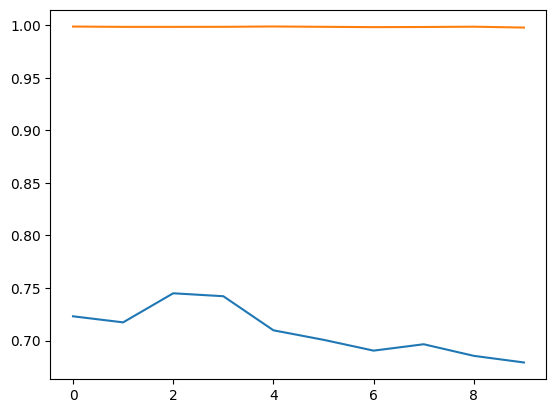

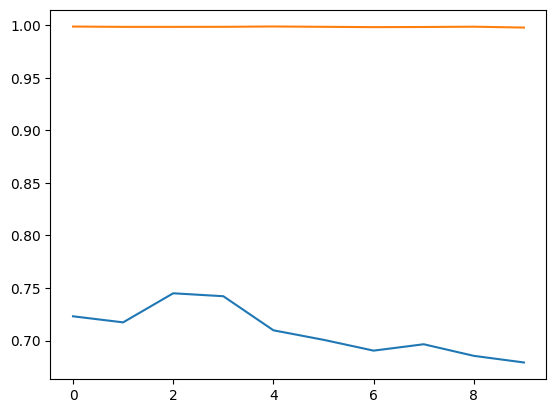

In [3]:
%%time
fls.profiling=False
model = flg_unet.UNetModel()
model.n_epochs = 10
model.train(train_data)
plt.figure()
plt.plot(model.train_loss_list1)
plt.plot(model.train_loss_list2)
model.train_loss_list2

In [4]:
%%time
importlib.reload(flg_unet)
fls.profiling=False
model = flg_unet.UNetModel()
dataset = model.dataset
dataset.data_list = copy.deepcopy(train_data)
for (i,d) in enumerate(dataset):
    if i>200:
        break

KeyboardInterrupt: 